Library Imports

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 

Fetch Dataset

In [2]:
spambase = fetch_ucirepo(id=94)

Metadata

In [3]:
print(spambase.metadata)

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

Variable Information

In [4]:
print(spambase.variables)

                          name     role        type demographic  \
0               word_freq_make  Feature  Continuous        None   
1            word_freq_address  Feature  Continuous        None   
2                word_freq_all  Feature  Continuous        None   
3                 word_freq_3d  Feature  Continuous        None   
4                word_freq_our  Feature  Continuous        None   
5               word_freq_over  Feature  Continuous        None   
6             word_freq_remove  Feature  Continuous        None   
7           word_freq_internet  Feature  Continuous        None   
8              word_freq_order  Feature  Continuous        None   
9               word_freq_mail  Feature  Continuous        None   
10           word_freq_receive  Feature  Continuous        None   
11              word_freq_will  Feature  Continuous        None   
12            word_freq_people  Feature  Continuous        None   
13            word_freq_report  Feature  Continuous        Non

Pandas Dataframes

In [5]:
x = spambase.data.features
y = spambase.data.targets

Part A: SVM Implementation

Train-Test-Split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

Vectorize X_Train and Y_Train

In [7]:
X_Train=x_train.to_numpy()
Y_Train=y_train.to_numpy().T[0]

Vectorize X_Test and Y_Test

In [8]:
X_Test=x_test.to_numpy()
Y_Test=y_test.to_numpy().T[0]

Predict Function

In [9]:
def predict(model,data):
    Y_Pred=[]
    for x in data:
        Y_Pred.append(model.predict([x])[0])
    return np.array(Y_Pred)

Metrics Function

In [10]:
def metrics(Y_Pred,Y_Test):
    accuracy, precision, recall, F1score = (0,0,0,0)
    TP,TN,FP,FN = (0,0,0,0)
    N=Y_Pred.shape[0]
    for i in range(0,N):
        if(Y_Pred[i]==Y_Test[i]):
            if(Y_Pred[i]==1):
                TP+=1
            else:
                TN+=1
        elif(Y_Pred[i]==1):
            FP+=1
        else:
            FN+=1
    if(TP+FP+TN+FN!=0):
        accuracy= (TP+TN)/(TP+FP+TN+FN)
    if(TP+FP!=0):
        precision= TP/(TP+FP)
    if(TP+FN!=0):
        recall= TP/(TP+FN)
    if(precision+recall!=0):
        F1score= (2*precision*recall)/(precision+recall)
    return accuracy,precision,recall,F1score

Train Function

In [11]:
def train(model, X_Train, Y_Train, X_Test, Y_Test):
    model.fit(X_Train,Y_Train)
    Y_Pred=predict(model,X_Test)
    accuracy, precision, recall, F1score = metrics(Y_Pred,Y_Test)
    return accuracy, precision, recall, F1score

Linear-SVM model

In [12]:
svm_model = SVC(kernel='linear')
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_Train)
X_train = scaling.transform(X_Train)
X_test = scaling.transform(X_Test)

Prediction and Evaluation

In [13]:
accuracy, precision, recall, F1score = train(svm_model,X_train,Y_Train,X_test,Y_Test)

In [14]:
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {F1score}")

Accuracy: 0.9131378935939196
Precision: 0.9329608938547486
Recall: 0.8564102564102564
F1-Score: 0.8930481283422459


Regularization

In [15]:
C=[0.001, 0.1, 1, 10, 100]
Accuracy=[]
for val in C:
    model = SVC(kernel='linear', C=val)
    accuracy, precision, recall, F1score = train(model,X_train,Y_Train,X_test,Y_Test)
    Accuracy.append(accuracy)

In [16]:
Accuracy

[0.5765472312703583,
 0.8783930510314875,
 0.9131378935939196,
 0.9229098805646037,
 0.9239956568946797]

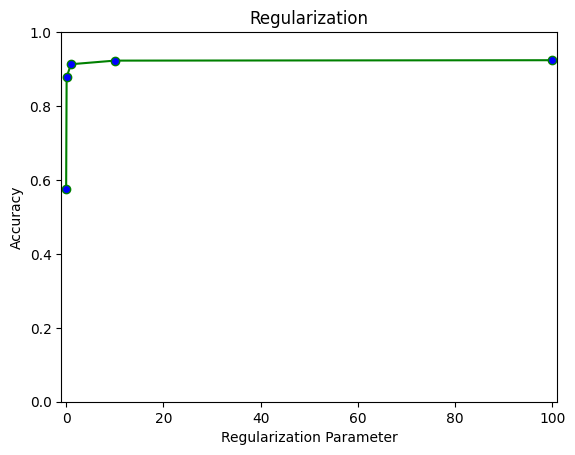

In [17]:
plt.plot(C, Accuracy,color='green',marker='o', markerfacecolor='blue') 
plt.ylim(0,1) 
plt.xlim(-1,101)
plt.xlabel('Regularization Parameter')
plt.ylabel('Accuracy') 
plt.title('Regularization') 
plt.show() 

Part B: Kernel Tricks

Polynomial Kernel Degree 2

In [18]:
model = SVC(kernel='poly', degree=2)
accuracy, precision, recall, F1score = train(model,X_train,Y_Train,X_test,Y_Test)
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {F1score}")

Accuracy: 0.9370249728555917
Precision: 0.9391534391534392
Recall: 0.9102564102564102
F1-Score: 0.9244791666666666


Polynomial Kernel Degree 3

In [19]:
model = SVC(kernel='poly', degree=3)
accuracy, precision, recall, F1score = train(model,X_train,Y_Train,X_test,Y_Test)
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {F1score}")

Accuracy: 0.9348534201954397
Precision: 0.9411764705882353
Recall: 0.9025641025641026
F1-Score: 0.9214659685863874


Sigmoid

In [20]:
model = SVC(kernel='sigmoid')
accuracy, precision, recall, F1score = train(model,X_train,Y_Train,X_test,Y_Test)
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {F1score}")

Accuracy: 0.5765472312703583
Precision: 0
Recall: 0.0
F1-Score: 0


RBF

In [21]:
model = SVC(kernel='rbf')
accuracy, precision, recall, F1score = train(model,X_train,Y_Train,X_test,Y_Test)
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {F1score}")

Accuracy: 0.9326818675352877
Precision: 0.9530386740331491
Recall: 0.8846153846153846
F1-Score: 0.9175531914893617


Part C: Overfitting & Underfitting Analysis

In [22]:
def train_metrics(model,x_train,y_train):
    y_pred=predict(model,x_train)
    accuracy, precision, recall, F1score = metrics(y_pred,y_train)
    return accuracy, precision, recall, F1score

In [24]:
D=[1,3]
C=[0.01,100]
pdegree=[]
cv=[]
train_accuracy=[]
test_accuracy=[]
for d in D:
    for c in C:
        pdegree.append(d)
        cv.append(c)
        model = SVC(kernel='poly', degree=d, C=c)
        accuracy, precision, recall, F1score = train(model,X_train,Y_Train,X_test,Y_Test)
        test_accuracy.append(accuracy)
        accuracy, precision, recall, F1score = train_metrics(model,X_train,Y_Train)
        train_accuracy.append(accuracy)
exp_result=pd.DataFrame({
    'Polynomial Degree': pdegree,
    'C Value': cv,
    'Training Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

In [25]:
print(exp_result)

   Polynomial Degree  C Value  Training Accuracy  Test Accuracy
0                  1     0.01           0.822554       0.809989
1                  1   100.00           0.935870       0.923996
2                  3     0.01           0.950815       0.938111
3                  3   100.00           0.938587       0.893594


In [26]:
N=len(D)*len(C)
X_Label=[i for i in range(1,N+1)]

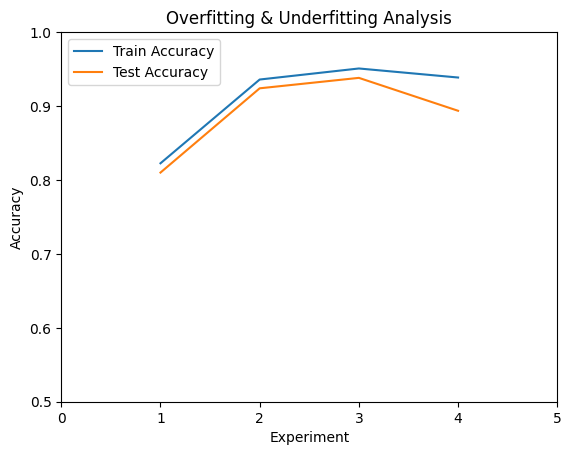

In [27]:
plt.plot(X_Label, train_accuracy, label = "Train Accuracy")
plt.plot(X_Label, test_accuracy, label = "Test Accuracy") 
plt.ylim(0.5,1) 
plt.xlim(0,N+1)
plt.xlabel('Experiment')
plt.ylabel('Accuracy')
plt.title('Overfitting & Underfitting Analysis') 
plt.legend() 
plt.show() 